In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [5]:
# Generación de df.

Generales = 'J:/Mi unidad/Experimento/Plantillas finales/Generales.xlsx'
Ballotage = 'J:/Mi unidad/Experimento/Analisis/Datos filtrados (3 Desvios estándar).xlsx'

df = pd.read_excel(Generales)

In [6]:
# Variables a analizar.

Variables = [
    "ip_item_3_tiempo",
    "ip_item_4_tiempo",
    "ip_item_5_tiempo",
    "ip_item_6_tiempo",
    "ip_item_7_tiempo",
    "ip_item_8_tiempo",
    "ip_item_9_tiempo",
    "ip_item_10_tiempo",
    "ip_item_11_tiempo",
    "ip_item_16_tiempo",
    "ip_item_19_tiempo",
    "ip_item_20_tiempo",
    "ip_item_22_tiempo",
    "ip_item_23_tiempo",
    "ip_item_24_tiempo",
    "ip_item_25_tiempo",
    "ip_item_27_tiempo",
    "ip_item_28_tiempo",
    "ip_item_29_tiempo",
    "ip_item_30_tiempo",
    "IP_item3_Der_tiempo",
    "IP_item3_Izq_tiempo",
    "IP_item4_Der_tiempo",
    "IP_item4_Izq_tiempo",
    "IP_item5_Der_tiempo",
    "IP_item5_Izq_tiempo",
    "IP_item6_Der_tiempo",
    "IP_item6_Izq_tiempo",
    "IP_item7_Der_tiempo",
    "IP_item7_Izq_tiempo",
    "IP_item8_Der_tiempo",
    "IP_item8_Izq_tiempo",
    "IP_item9_Der_tiempo",
    "IP_item9_Izq_tiempo",
    "IP_item10_Der_tiempo",
    "IP_item10_Izq_tiempo",
    "IP_item11_Der_tiempo",
    "IP_item11_Izq_tiempo",
    "IP_item16_Der_tiempo",
    "IP_item16_Izq_tiempo",
    "IP_item19_Der_tiempo",
    "IP_item19_Izq_tiempo",
    "IP_item20_Der_tiempo",
    "IP_item20_Izq_tiempo",
    "IP_item22_Der_tiempo",
    "IP_item22_Izq_tiempo",
    "IP_item23_Der_tiempo",
    "IP_item23_Izq_tiempo",
    "IP_item24_Der_tiempo",
    "IP_item24_Izq_tiempo",
    "IP_item25_Der_tiempo",
    "IP_item25_Izq_tiempo",
    "IP_item27_Der_tiempo",
    "IP_item27_Izq_tiempo",
    "IP_item28_Der_tiempo",
    "IP_item28_Izq_tiempo",
    "IP_item29_Der_tiempo",
    "IP_item29_Izq_tiempo",
    "IP_item30_Der_tiempo",
    "IP_item30_Izq_tiempo",
]

In [7]:
# Juntar todos los datos en un array.

Datos_Totales_Crudos = df[Variables].values.flatten()  # 'flatten()' convierte una matriz 2D en una 1D: nos queda una matriz de 1 fila.

In [8]:
# Eliminar los NaN.

Datos_Totales = Datos_Totales_Crudos[~np.isnan(Datos_Totales_Crudos)]



In [9]:
# Media de todos los elementos de las variables.

Promedio = np.mean(Datos_Totales)

In [10]:
# Desvío estándar de todos los elementos de las variables.

Desvio_Estandar = np.std(Datos_Totales)

print("Promedio general de todas las variables:", Promedio)
print("Desvío estándar general de todas las variables:", Desvio_Estandar)

Promedio general de todas las variables: 9.916319581796849
Desvío estándar general de todas las variables: 9.870255865617553


In [11]:
# Límites superiores e inferiores de datos aceptados (con 2 y 3 desvíos estándar).

Lim_Sup_2D = Promedio + (2 * Desvio_Estandar)
Lim_Inf_2D = Promedio - (2 * Desvio_Estandar)

Lim_Sup_3D = Promedio + (3 * Desvio_Estandar)
Lim_Inf_3D = Promedio - (3 * Desvio_Estandar)

In [12]:
# Valores por fuera.

Valores_Fuera_2D = Datos_Totales[(Datos_Totales > Lim_Sup_2D) | (Datos_Totales < Lim_Inf_2D)]
Valores_Fuera_3D = Datos_Totales[(Datos_Totales > Lim_Sup_3D) | (Datos_Totales < Lim_Inf_3D)]

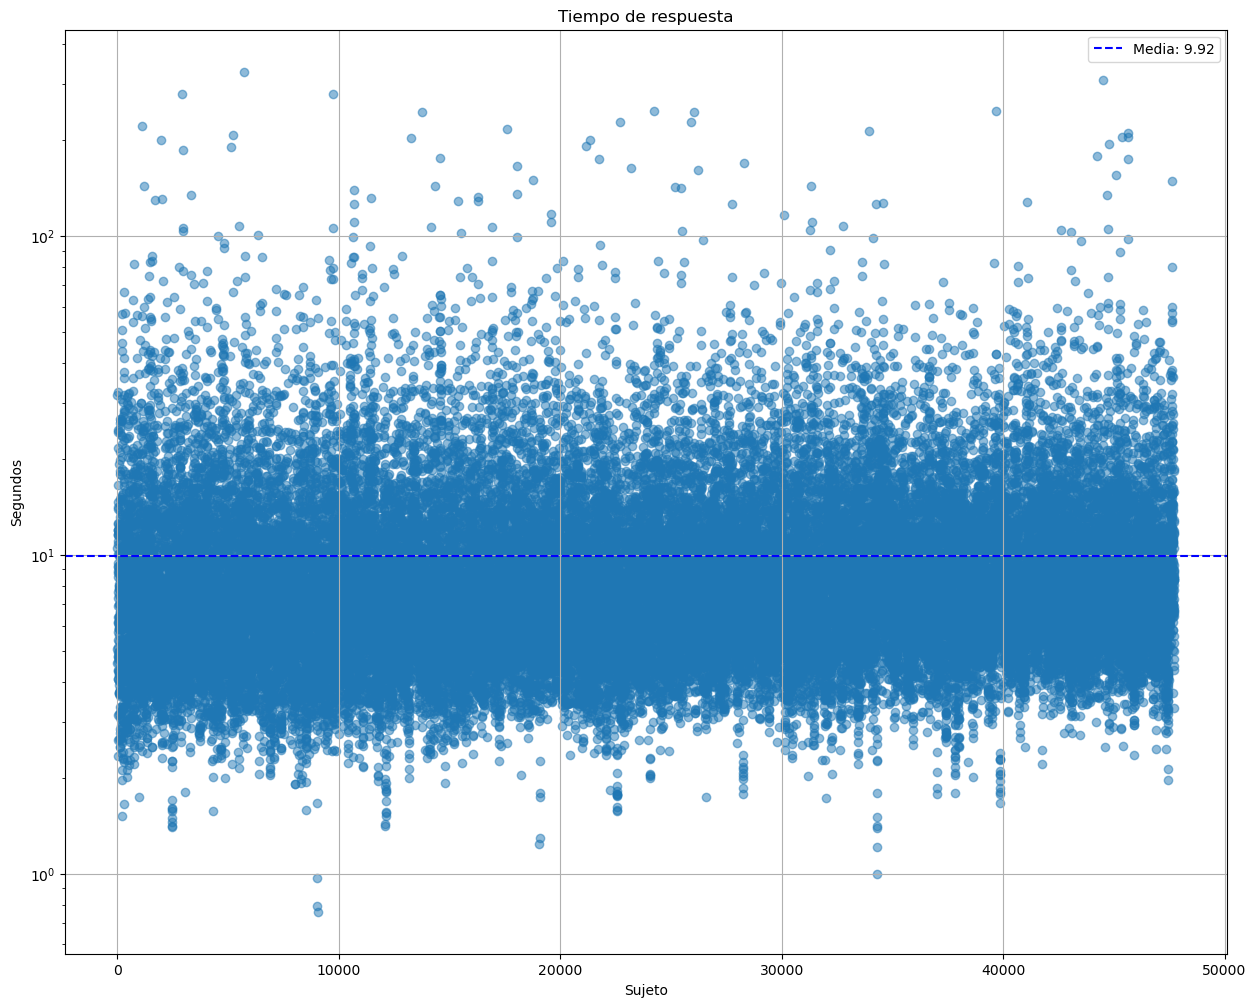

In [13]:
# Gráfico.

# Figura.
plt.figure(figsize=(15, 12))

# Variables: la frecuencia y los datos.
plt.scatter(range(len(Datos_Totales)), Datos_Totales, alpha=0.5)

# Título y ejes.
plt.title("Tiempo de respuesta")
plt.xlabel("Sujeto")
plt.ylabel("Segundos")

# Escala logarítmica en el eje y (vertical).
plt.yscale('log')

# Línea de tendencia.
plt.axhline(Promedio, color='b', linestyle='--', label=f'Media: {Promedio:.2f}')

# # Línea de desvío.
# plt.axhline(Desvio_Estandar, color='g', linestyle='--', label=f'Desvio Estandar: {Desvio_Estandar:.2f}')

# # Línea de 2 desvíos.
# plt.axhline(Lim_Sup_2D, color='orange', linestyle='--', label=f'Media + 2 Desvio Estandar: {Lim_Sup_2D:.2f}')

# # Línea de 3 desvíos.
# plt.axhline(Lim_Sup_3D, color='red', linestyle='--', label=f'Media + 3 Desvio Estandar: {Lim_Sup_3D:.2f}')

# # Valores por fuera de 2 desvíos estándar.
# plt.scatter(np.where((Datos_Totales > Lim_Sup_2D) | (Datos_Totales < Lim_Inf_2D))[0], 
#             Valores_Fuera_2D, color='orange', label="Fuera de 2 DE")

# # Valores por fuera de 3 desvíos estándar.
# plt.scatter(np.where((Datos_Totales > Lim_Sup_3D) | (Datos_Totales < Lim_Inf_3D))[0], 
#             Valores_Fuera_3D, color='red', label="Fuera de 3 DE")

# Leyenda en un cuadrito.
plt.legend()

# Cuadrícula.
plt.grid(True)

# Mostrar.
plt.show()

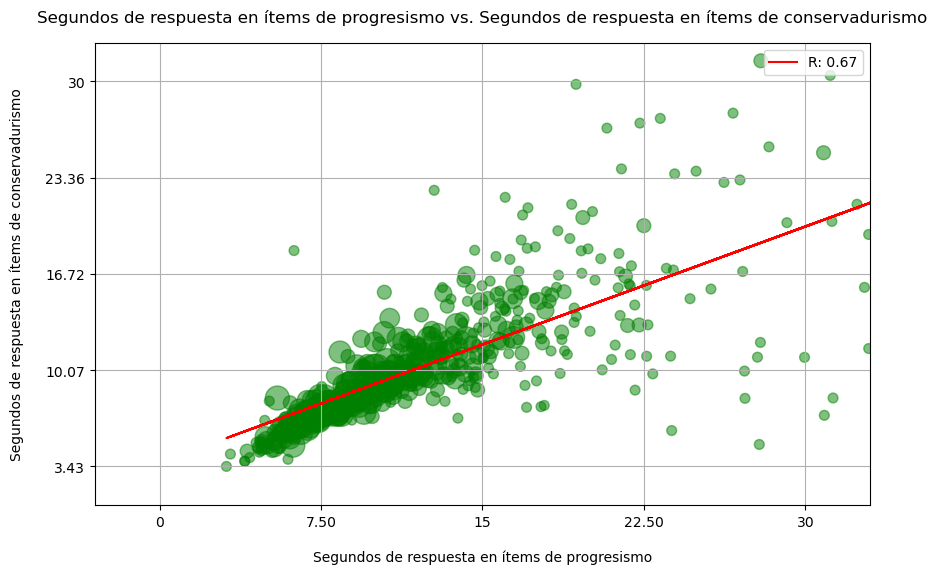

In [20]:
# Gráfico.

df['indice_conservadurismo'] = df['indice_conservadurismo'].astype(float).replace('-',"")
df['indice_conservadurismo_tiempo'] = df['indice_conservadurismo_tiempo'].astype(float).replace('-',"")

variable_x, variable_y = 'indice_progresismo_tiempo', 'indice_conservadurismo_tiempo'
leyenda_x, leyenda_y = 'Segundos de respuesta en ítems de progresismo', 'Segundos de respuesta en ítems de conservadurismo'
#leyenda_x_bajo, leyenda_x_alto = '+ Conservador', '+ Progresista'
min_x, max_x = 0, 30
min_y, max_y = min(df[variable_y]), 30

num_ticks = 4

ancho_x, ancho_y = abs(max_x-min_x), abs(max_y-min_y)
ancho_ticks_x, ancho_ticks_y = ancho_x/num_ticks, ancho_y/num_ticks



# Gráfico de regresión lineal con densidad de datos.

# Crear el gráfico
plt.figure(figsize=(10, 6))


# Coeficiente y línea de regresión.
# Calcular coeficiente de correlación
correlation_coefficient = df[[variable_x, variable_y]].corr().iloc[0,1]

# Calcular regresión lineal
slope, intercept, r_value, p_value, std_err = linregress(df[variable_x], df[variable_y])

# Superponer regresión lineal
plt.plot(df[variable_x], 
         intercept + slope * (df[variable_x]), 
         color='red', 
         label=f'R: {correlation_coefficient:.2f}')


# Definir el ancho de los intervalos
num_groups = 1000  # Número deseado de grupos
interval_width = (max_x - min_x) / num_groups

# Crear la columna de intervalos
df['interval'] = ((df[variable_x] - min_x) // interval_width).astype(int)

# Calcular el número de datos en cada intervalo
df_counts = df.groupby('interval').size().reset_index(name='counts')

# Calcular el valor promedio de 'indice_progresismo_tiempo' para cada intervalo
df_means = df.groupby('interval').agg({variable_x: 'mean', variable_y: 'mean'}).reset_index()

# Combinar los DataFrames de cuentas y promedios
df_grouped = df_means.merge(df_counts, on='interval')

# Crear el gráfico de dispersión con tamaño ajustado por cantidad de datos
plt.scatter(df_grouped[variable_x], df_grouped[variable_y], s=df_grouped['counts'] * 50, color='green', alpha=0.5)



# Ejes.

#Límites de ejes.
# Configurar los límites de los ejes x e y para ambos gráficos
x_lim_inf, x_lim_sup = min_x-(ancho_x/10), max_x+(ancho_x/10)
y_lim_inf, y_lim_sup = min_y-(ancho_y/10), max_y+(ancho_y/10)

plt.xlim(x_lim_inf, x_lim_sup)
plt.ylim(y_lim_inf, y_lim_sup)



#Leyendas.
# Etiquetas de los ejes
plt.xlabel(leyenda_x, labelpad = 15)
plt.ylabel(leyenda_y, labelpad = 15)

# Definir las variables para los números y su separación
ticks_x = np.linspace(min_x, max_x, num=5)
ticks_y = np.linspace(min_y, max_y, num=5)

# Configurar los ticks para el eje x
plt.xticks(ticks_x, [f'{tick:.2f}' if tick != int(tick) else f'{int(tick)}' for tick in ticks_x])

# Configurar los ticks para el eje y
plt.yticks(ticks_y, [f'{tick:.2f}' if tick != int(tick) else f'{int(tick)}' for tick in ticks_y])


ancho_x_real, ancho_y_real = abs(x_lim_sup - x_lim_inf), abs(y_lim_sup - y_lim_inf)
posicion_x = x_lim_inf - (ancho_x_real * 0.06)  
posicion_y = y_lim_inf - (ancho_y_real * 0.08)  


# Agregar texto para las leyendas 'Min' y 'Max'

#Leyendas del eje x.
# plt.text(min_x, 
#          posicion_y, 
#          f'{leyenda_x_bajo}', 
#          ha='center', va='top', 
#          color='gray')

# plt.text(max_x, 
#          posicion_y, 
#          f'{leyenda_x_alto}', 
#          ha='center', va='top', 
#          color='gray')


# Leyenda
plt.legend()

# Título
plt.title(f'{leyenda_x} vs. {leyenda_y}', pad=15)

# Mostrar el gráfico
plt.grid(True)
plt.show()

In [15]:
df['indice_progresismo_tiempo']

0       14.780800
1        7.380500
2        6.743222
3       17.599800
4       11.164400
          ...    
1251    12.933889
1252    13.906500
1253    24.286000
1254    14.242500
1255     8.178333
Name: indice_progresismo_tiempo, Length: 1256, dtype: float64